Imports

In [51]:
%load_ext autoreload
%autoreload 2

import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.models import resnet34

from MLProject2Dataset import MLProject2Dataset, MLProject2DatasetSmall
from CNNModels import SimpleCNN, ComplexCNN
from helper_functions import display_conf_matrix, plot_training_progress, train_net, test_net, print_train_time

from timeit import default_timer as timer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Επιλογή συσκευής

In [52]:
start_time = timer()

device = ("cuda" if torch.cuda.is_available()
          else "mps" if torch.backends.mps.is_available()
          else "cpu")

Ορισμός κλάσεων προβλέψεων

In [53]:
classes = {
    0: 'MEL',
    1: 'NV',
    2: 'BCC',
    3: 'AKIEC',
    4: 'BKL',
    5: 'DF',
    6: 'VASC'
}

# 4. Απλό ΣΝΔ

## 4.1 Δημιουργία υποσυνόλου εκπαίδευσης, δοκιμής

In [54]:
image_transforms = transforms.Compose([
            transforms.Resize((50, 62), antialias=True),
            transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
        ])

dataset = MLProject2Dataset('./data/dermoscopy_classification', transform=image_transforms, subset='tiny')

generator = torch.Generator().manual_seed(42)
train, validate, test = torch.utils.data.random_split(dataset, [0.6, 0.1, 0.3], generator)

In [55]:
train_dataloader = DataLoader(train, batch_size=64, shuffle=True)
validate_dataloader = DataLoader(validate, batch_size=64, shuffle=False)
test_dataloader = DataLoader(test, batch_size=64, shuffle=False)

In [56]:
model = SimpleCNN().to(device)
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1)

## 4.2 Εκπαίδευση

In [57]:
epochs, t_loss, t_acc, v_loss, v_acc = train_net(model, train_dataloader, validate_dataloader, optimizer = optimizer, loss=loss_fn, device=device, print_period=10, epochs=20)

Training on cuda
[Epoch: 0, batch:     0] Train loss: 0.197, Train acc: 0.094 | Validation loss: 1.883, Validation acc: 0.550
Epoch 0 | Train loss 1.924, Train accuracy 0.333 | Validation loss 1.807, Validation accuracy: 0.550
[Epoch: 1, batch:     0] Train loss: 0.177, Train acc: 0.625 | Validation loss: 1.674, Validation acc: 0.550
Epoch 1 | Train loss 1.691, Train accuracy 0.633 | Validation loss 1.488, Validation accuracy: 0.550
[Epoch: 2, batch:     0] Train loss: 0.127, Train acc: 0.672 | Validation loss: 1.637, Validation acc: 0.550
Epoch 2 | Train loss 1.342, Train accuracy 0.633 | Validation loss 1.549, Validation accuracy: 0.550
[Epoch: 3, batch:     0] Train loss: 0.141, Train acc: 0.656 | Validation loss: 1.432, Validation acc: 0.550
Epoch 3 | Train loss 1.321, Train accuracy 0.633 | Validation loss 1.398, Validation accuracy: 0.550
[Epoch: 4, batch:     0] Train loss: 0.124, Train acc: 0.594 | Validation loss: 1.400, Validation acc: 0.550
Epoch 4 | Train loss 1.137, Train 

## 4.3 Γράφημα απώλειας και ευστοχίας

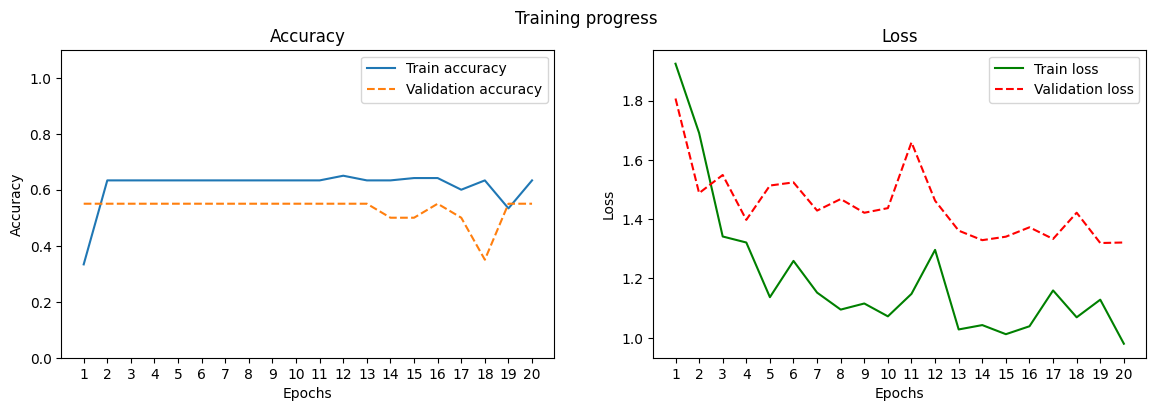

In [64]:
plot_training_progress(epochs, t_acc, v_acc, t_loss, v_loss)

## 4.4 Αξιολόγηση μοντέλου στο σύνολο δοκιμής

In [9]:
y_preds = test_net(model, test_dataloader, loss_fn, device)

Average loss: 0.0105. Test accuracy in 3004 images: 0.7533


## 4.5 Υπολογισμός πίνακα σύγχησης

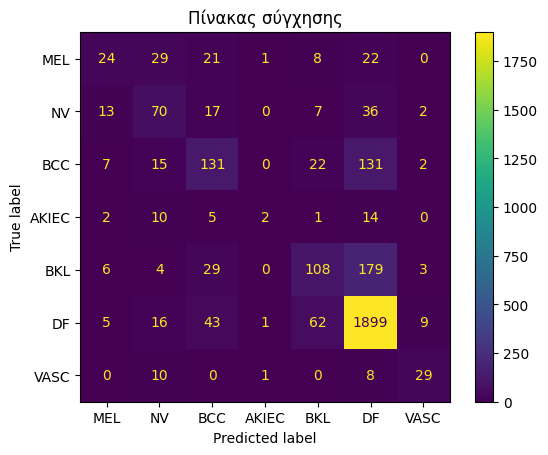

In [10]:
display_conf_matrix(y_preds, test, classes)

# 5. Σύνθετο ΣΝΔ

## 5.1 Δημιουργία υποσυνόλου εκπαίδευσης, δοκιμής

In [11]:
image_transforms = transforms.Compose([
            transforms.Resize((100, 125), antialias=True),
            transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
        ])

dataset = MLProject2Dataset('./data/dermoscopy_classification', transform=image_transforms)
# dataset = MLProject2DatasetSmall('./data/dermoscopy_classification', transform=image_transforms)

generator = torch.Generator().manual_seed(42)
train, validate, test = torch.utils.data.random_split(dataset, [0.6, 0.1, 0.3], generator)

In [12]:
train_dataloader = DataLoader(train, batch_size=64, shuffle=True)
validate_dataloader = DataLoader(validate, batch_size=64, shuffle=False)
test_dataloader = DataLoader(test, batch_size=64, shuffle=False)

In [13]:
model = ComplexCNN().to(device)
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001)

## 5.2 Εκπαίδευση

In [14]:
epochs, t_loss, t_acc, v_loss, v_acc = train_net(model, train_dataloader, validate_dataloader, optimizer = optimizer, loss=loss_fn, device=device, print_period=10, epochs=20)

Training on cuda
[Epoch: 0, batch:     0] Train loss: 0.224, Train acc: 0.172 | Validation loss: 1.925, Validation acc: 0.054
[Epoch: 0, batch:    10] Train loss: 1.495, Train acc: 0.502 | Validation loss: 1.992, Validation acc: 0.132
[Epoch: 0, batch:    20] Train loss: 1.072, Train acc: 0.672 | Validation loss: 1.808, Validation acc: 0.351
[Epoch: 0, batch:    30] Train loss: 1.035, Train acc: 0.677 | Validation loss: 1.370, Validation acc: 0.682
[Epoch: 0, batch:    40] Train loss: 0.972, Train acc: 0.675 | Validation loss: 1.080, Validation acc: 0.681
[Epoch: 0, batch:    50] Train loss: 0.920, Train acc: 0.700 | Validation loss: 0.932, Validation acc: 0.696
[Epoch: 0, batch:    60] Train loss: 0.883, Train acc: 0.705 | Validation loss: 0.875, Validation acc: 0.713
[Epoch: 0, batch:    70] Train loss: 0.913, Train acc: 0.694 | Validation loss: 0.857, Validation acc: 0.706
[Epoch: 0, batch:    80] Train loss: 0.804, Train acc: 0.736 | Validation loss: 0.828, Validation acc: 0.706
[E

## 5.3 Γράφημα απώλειας και ευστοχίας

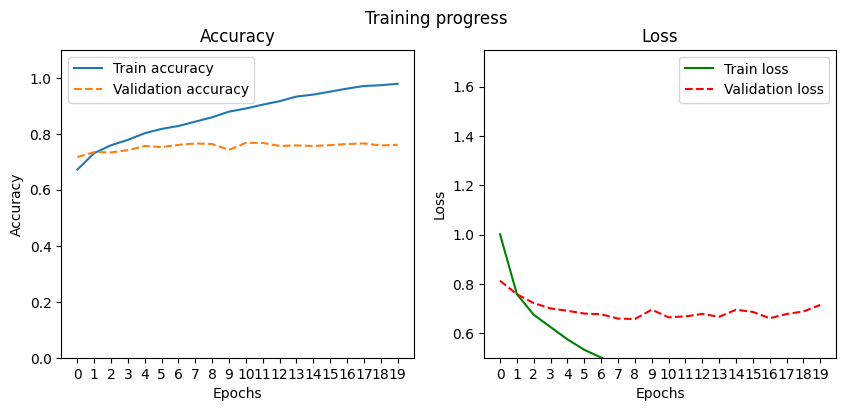

In [15]:
plot_training_progress(epochs, t_acc, v_acc, t_loss, v_loss)

## 5.4 Αξιολόγηση μοντέλου στο σύνολο δοκιμής

In [16]:
y_preds = test_net(model, test_dataloader, loss_fn, device)

Average loss: 0.0112. Test accuracy in 3004 images: 0.7656


## 5.5 Υπολογισμός πίνακα σύγχησης

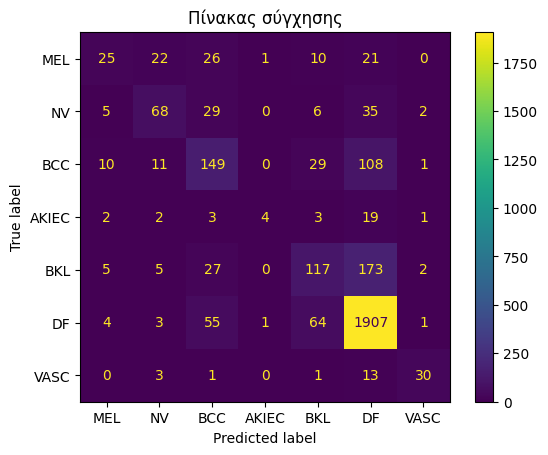

In [17]:
display_conf_matrix(y_preds, test, classes)

# 6. Μεταφορά μάθησης

## 6.1 Δημιουργία υποσυνόλου εκπαίδευσης, δοκιμής

In [30]:
data_transforms = {
        'train' : transforms.Compose([
            transforms.RandomResizedCrop(224, antialias=True),
            transforms.RandomHorizontalFlip(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val' : transforms.Compose([
            transforms.Resize(256, antialias=True),
            transforms.CenterCrop(224),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
    }

dataset_train = MLProject2Dataset('./data/dermoscopy_classification', transform=data_transforms['train'])
dataset_val = MLProject2Dataset('./data/dermoscopy_classification', transform=data_transforms['val'])

# dataset_train = MLProject2DatasetSmall('./data/dermoscopy_classification', transform=data_transforms['train'])
# dataset_val = MLProject2DatasetSmall('./data/dermoscopy_classification', transform=data_transforms['val'])

generator = torch.Generator().manual_seed(42)
train, _, _ = torch.utils.data.random_split(dataset_train, [0.6, 0.1, 0.3], generator)
generator = torch.Generator().manual_seed(42)
_, validate, test = torch.utils.data.random_split(dataset_val, [0.6, 0.1, 0.3], generator)

train_dataloader = DataLoader(train, batch_size=64, shuffle=True)
validate_dataloader = DataLoader(validate, batch_size=64, shuffle=False)
test_dataloader = DataLoader(test, batch_size=64, shuffle=False)

In [31]:
model = resnet34(weights='DEFAULT').to(device)
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

## 6.2 Εκπαίδευση

In [32]:
epochs, t_loss, t_acc, v_loss, v_acc = train_net(model, train_dataloader, validate_dataloader, optimizer = optimizer, loss=loss_fn, device=device, print_period=10, epochs=5)

Training on cuda
[Epoch: 0, batch:     0] Train loss: 0.952, Train acc: 0.000 | Validation loss: 8.021, Validation acc: 0.010
[Epoch: 0, batch:    10] Train loss: 5.961, Train acc: 0.211 | Validation loss: 4.107, Validation acc: 0.656
[Epoch: 0, batch:    20] Train loss: 2.127, Train acc: 0.658 | Validation loss: 3.081, Validation acc: 0.687


KeyboardInterrupt: 

## 6.3 Γράφημα απώλειας και ευστοχίας

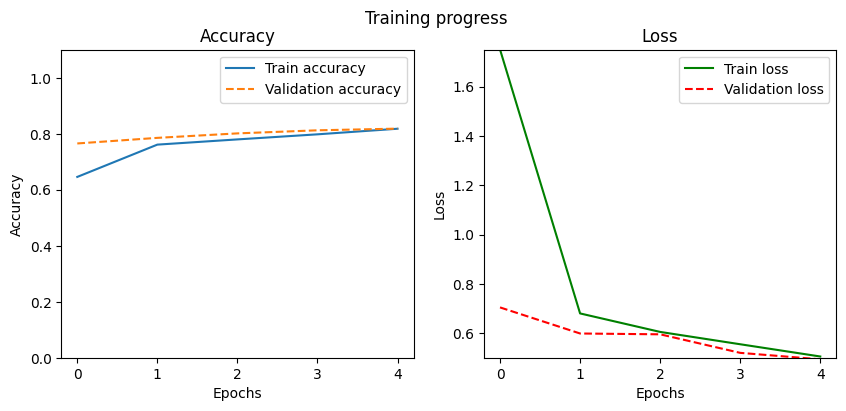

In [ ]:
plot_training_progress(epochs, t_acc, v_acc, t_loss, v_loss)

## 6.4 Αξιολόγηση μοντέλου στο σύνολο δοκιμής

In [ ]:
y_preds = test_net(model, test_dataloader, loss_fn, device)

Average loss: 0.0082. Test accuracy in 3004 images: 0.8199


## 6.5 Υπολογισμός πίνακα σύγχησης

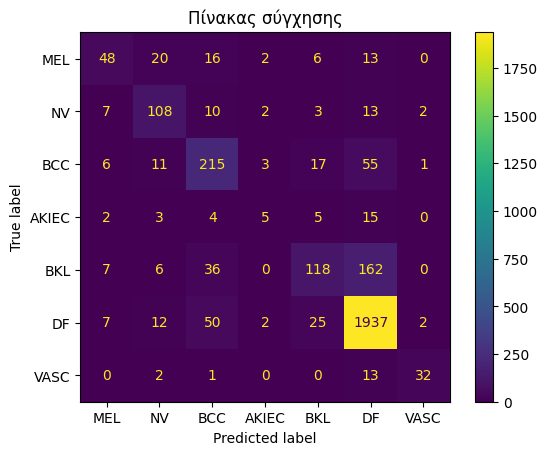

Train time on cuda: 3499.986 seconds


In [ ]:
display_conf_matrix(y_preds, test, classes)

# Print total time since start_time
print_train_time(start=start_time, end=timer(), device=device)